In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#  다음 전설포켓몬 예측 
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/kaglee/pokemon_alopez247.csv")
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [3]:
df.tail()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,95,6,True,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,70,6,True,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only
720,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,Brown,False,NaN,Undiscovered,NaN,False,1.70,195.0,3,quadruped


In [4]:
df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


In [5]:
df.dtypes

Number                int64
Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

In [6]:
df.isnull().sum()

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

In [7]:
df['isLegendary'].value_counts()

False    675
True      46
Name: isLegendary, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


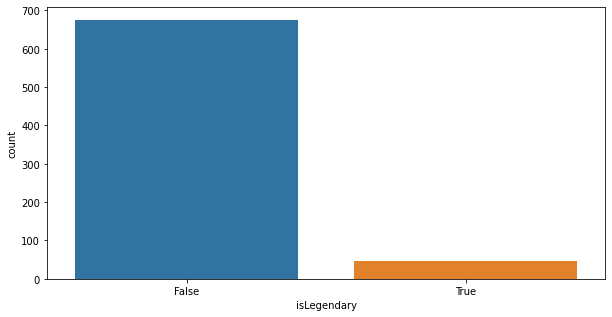

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(df['isLegendary'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


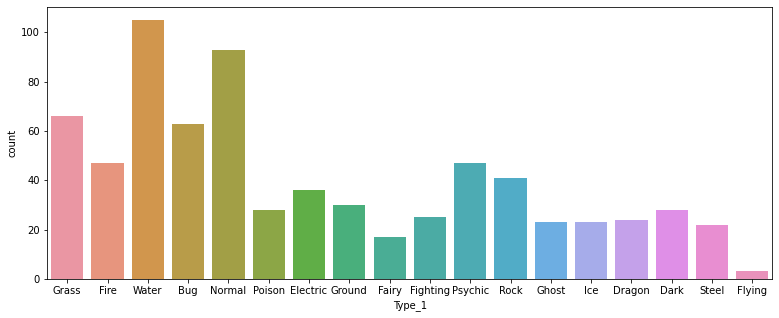

In [9]:
# type1 type2 데이터 겹칠수 있는지 확인 그래프
plt.figure(figsize=(13,5))
sns.countplot(df['Type_1'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


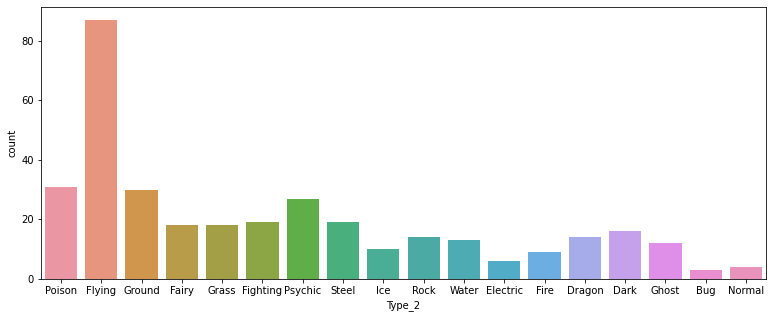

In [10]:
plt.figure(figsize=(13,5))
sns.countplot(df['Type_2'])
plt.show()

Text(0, 0.5, 'No. of Pokemon')

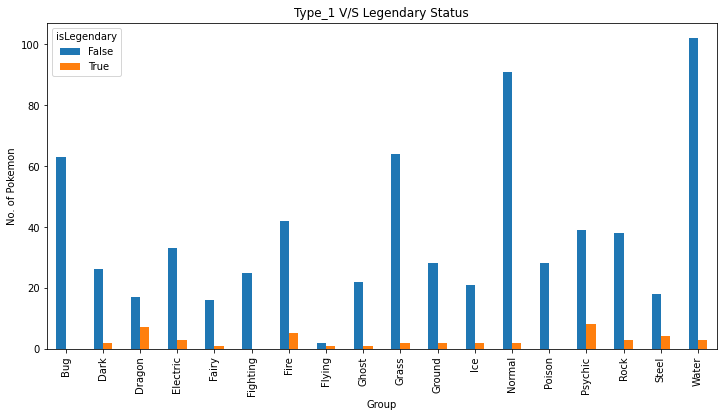

In [11]:
# type1 type2 과 target 으로 잡은 isLegendary 비교  

pd.crosstab(df.Type_1, df.isLegendary).plot(kind='bar', figsize=(12,6))

plt.title('Type_1 V/S Legendary Status')
plt.xlabel('Group')
plt.ylabel('No. of Pokemon')

Text(0, 0.5, 'No. of Pokemon')

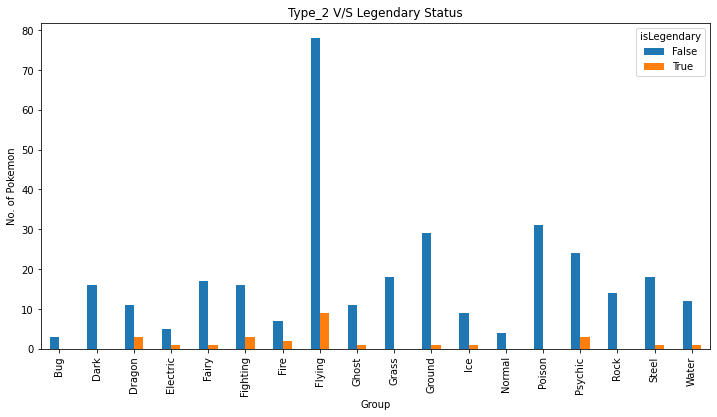

In [12]:
pd.crosstab(df.Type_2, df.isLegendary).plot(kind='bar', figsize=(12,6))

plt.title('Type_2 V/S Legendary Status')
plt.xlabel('Group')
plt.ylabel('No. of Pokemon')

In [13]:
# type1 type2 데이터 합치기 
type_1 = pd.get_dummies(df['Type_1'],drop_first=True,prefix = '1')

In [14]:
type_2 = pd.get_dummies(df['Type_2'],drop_first = True)

In [15]:
data = pd.concat([type_1,type_2],axis=1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   1_Dark      721 non-null    uint8
 1   1_Dragon    721 non-null    uint8
 2   1_Electric  721 non-null    uint8
 3   1_Fairy     721 non-null    uint8
 4   1_Fighting  721 non-null    uint8
 5   1_Fire      721 non-null    uint8
 6   1_Flying    721 non-null    uint8
 7   1_Ghost     721 non-null    uint8
 8   1_Grass     721 non-null    uint8
 9   1_Ground    721 non-null    uint8
 10  1_Ice       721 non-null    uint8
 11  1_Normal    721 non-null    uint8
 12  1_Poison    721 non-null    uint8
 13  1_Psychic   721 non-null    uint8
 14  1_Rock      721 non-null    uint8
 15  1_Steel     721 non-null    uint8
 16  1_Water     721 non-null    uint8
 17  Dark        721 non-null    uint8
 18  Dragon      721 non-null    uint8
 19  Electric    721 non-null    uint8
 20  Fairy       721 non-null    uint

In [17]:
data.columns

Index(['1_Dark', '1_Dragon', '1_Electric', '1_Fairy', '1_Fighting', '1_Fire',
       '1_Flying', '1_Ghost', '1_Grass', '1_Ground', '1_Ice', '1_Normal',
       '1_Poison', '1_Psychic', '1_Rock', '1_Steel', '1_Water', 'Dark',
       'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost',
       'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock',
       'Steel', 'Water'],
      dtype='object')

In [18]:
data.loc[(data['1_Dark']==1) |(data['Dark']==1),"dark"]=1 
data.loc[(data['1_Dark']!=1) &(data['Dark']!=1),"dark"]=0 

data.loc[(data['1_Dragon']!=1) |(data['Dragon']!=1),"dragon"]=1
data.loc[(data['1_Dragon']!=1) &(data['Dragon']!=1),"dragon"]=0

data.loc[(data['1_Electric']!=1) |(data['Electric']!=1),"electric"]=1
data.loc[(data['1_Electric']!=1) &(data['Electric']!=1),"electric"]=0


data.loc[(data['1_Fairy']!=1) |(data['Fairy']!=1),"fairy"]=1
data.loc[(data['1_Fairy']!=1) &(data['Fairy']!=1),"fairy"]=0


data.loc[(data['1_Fighting']!=1) |(data['Fighting']!=1),"fighting"]=1
data.loc[(data['1_Fighting']!=1) &(data['Fighting']!=1),"fighting"]=0

data.loc[(data['1_Fire']!=1) |(data['Fire']!=1),"fire"]=1
data.loc[(data['1_Fire']!=1) &(data['Fire']!=1),"fire"]=0

data.loc[(data['1_Flying']!=1) |(data['Flying']!=1),"flying"]=1
data.loc[(data['1_Flying']!=1) &(data['Flying']!=1),"flying"]=0

data.loc[(data['1_Ghost']!=1) |(data['Ghost']!=1),"ghost"]=1
data.loc[(data['1_Ghost']!=1) &(data['Ghost']!=1),"ghost"]=0

data.loc[(data['1_Grass']!=1) |(data['Grass']!=1),"grass"]=1
data.loc[(data['1_Grass']!=1) &(data['Grass']!=1),"grass"]=0


data.loc[(data['1_Ground']!=1) |(data['Ground']!=1),"ground"]=1
data.loc[(data['1_Ground']!=1) &(data['Ground']!=1),"ground"]=0


data.loc[(data['1_Ice']!=1) |(data['Ice']!=1),"ice"]=1
data.loc[(data['1_Ice']!=1) &(data['Ice']!=1),"ice"]=0

data.loc[(data['1_Normal']!=1) |(data['Normal']!=1),"normal"]=1
data.loc[(data['1_Normal']!=1) &(data['Normal']!=1),"normal"]=0

data.loc[(data['1_Poison']!=1) |(data['Poison']!=1),"poison"]=1
data.loc[(data['1_Poison']!=1) &(data['Poison']!=1),"poison"]=0

data.loc[(data['1_Psychic']!=1) |(data['Psychic']!=1),"psychic"]=1
data.loc[(data['1_Psychic']!=1) &(data['Psychic']!=1),"psychic"]=0

data.loc[(data['1_Rock']!=1) |(data['Rock']!=1),"rock"]=1
data.loc[(data['1_Rock']!=1) &(data['Rock']!=1),"rock"]=0

data.loc[(data['1_Steel']!=1) |(data['Steel']!=1),"steel"]=1
data.loc[(data['1_Steel']!=1) &(data['Steel']!=1),"steel"]=0

data.loc[(data['1_Water']!=1) |(data['Water']!=1),"water"]=1
data.loc[(data['1_Water']!=1) &(data['Water']!=1),"water"]=0

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1_Dark      721 non-null    uint8  
 1   1_Dragon    721 non-null    uint8  
 2   1_Electric  721 non-null    uint8  
 3   1_Fairy     721 non-null    uint8  
 4   1_Fighting  721 non-null    uint8  
 5   1_Fire      721 non-null    uint8  
 6   1_Flying    721 non-null    uint8  
 7   1_Ghost     721 non-null    uint8  
 8   1_Grass     721 non-null    uint8  
 9   1_Ground    721 non-null    uint8  
 10  1_Ice       721 non-null    uint8  
 11  1_Normal    721 non-null    uint8  
 12  1_Poison    721 non-null    uint8  
 13  1_Psychic   721 non-null    uint8  
 14  1_Rock      721 non-null    uint8  
 15  1_Steel     721 non-null    uint8  
 16  1_Water     721 non-null    uint8  
 17  Dark        721 non-null    uint8  
 18  Dragon      721 non-null    uint8  
 19  Electric    721 non-null    u

In [20]:
data.drop(['1_Dark', '1_Dragon', '1_Electric', '1_Fairy', '1_Fighting', '1_Fire',
       '1_Flying', '1_Ghost', '1_Grass', '1_Ground', '1_Ice', '1_Normal',
       '1_Poison', '1_Psychic', '1_Rock', '1_Steel', '1_Water', 'Dark',
       'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost',
       'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock',
       'Steel', 'Water', 'Normal'],inplace = True, axis=1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dark      721 non-null    float64
 1   dragon    721 non-null    float64
 2   electric  721 non-null    float64
 3   fairy     721 non-null    float64
 4   fighting  721 non-null    float64
 5   fire      721 non-null    float64
 6   flying    721 non-null    float64
 7   ghost     721 non-null    float64
 8   grass     721 non-null    float64
 9   ground    721 non-null    float64
 10  ice       721 non-null    float64
 11  normal    721 non-null    float64
 12  poison    721 non-null    float64
 13  psychic   721 non-null    float64
 14  rock      721 non-null    float64
 15  steel     721 non-null    float64
 16  water     721 non-null    float64
dtypes: float64(17)
memory usage: 95.9 KB


In [22]:
data = data.astype('int')

In [23]:
df = pd.concat([df,data],axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [25]:
df.drop(['Type_1','Type_2'],axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


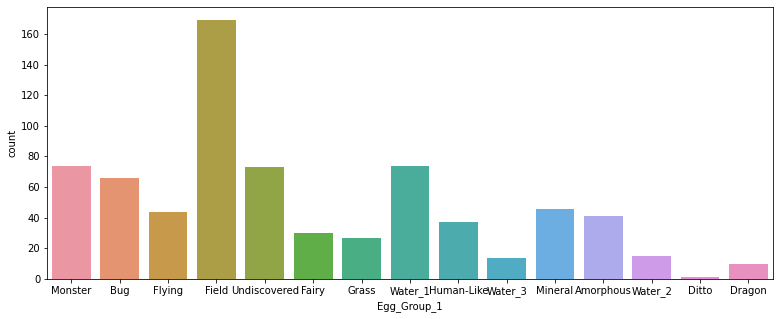

In [26]:
plt.figure(figsize=(13,5))
sns.countplot(df['Egg_Group_1'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


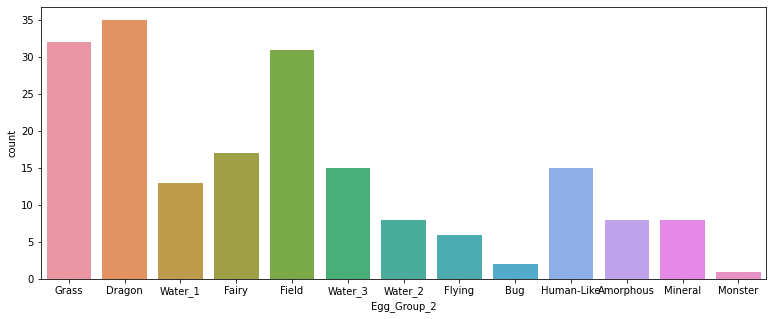

In [27]:
plt.figure(figsize=(13,5))
sns.countplot(df['Egg_Group_2'])
plt.show()

In [28]:
egg_1 = pd.get_dummies(df['Egg_Group_1'],drop_first=True)

In [29]:
egg_2 = pd.get_dummies(df['Egg_Group_2'],drop_first=True,prefix = '1')

In [30]:
egg_2

,1_Bug,1_Dragon,1_Fairy,1_Field,1_Flying,1_Grass,1_Human-Like,1_Mineral,1_Monster,1_Water_1,1_Water_2,1_Water_3
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
716,0,0,0,0,0,0,0,0,0,0,0,0
717,0,0,0,0,0,0,0,0,0,0,0,0
718,0,0,0,0,0,0,0,0,0,0,0,0
719,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
data_2 = pd.concat([egg_2,egg_1],axis=1)

In [32]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   1_Bug         721 non-null    uint8
 1   1_Dragon      721 non-null    uint8
 2   1_Fairy       721 non-null    uint8
 3   1_Field       721 non-null    uint8
 4   1_Flying      721 non-null    uint8
 5   1_Grass       721 non-null    uint8
 6   1_Human-Like  721 non-null    uint8
 7   1_Mineral     721 non-null    uint8
 8   1_Monster     721 non-null    uint8
 9   1_Water_1     721 non-null    uint8
 10  1_Water_2     721 non-null    uint8
 11  1_Water_3     721 non-null    uint8
 12  Bug           721 non-null    uint8
 13  Ditto         721 non-null    uint8
 14  Dragon        721 non-null    uint8
 15  Fairy         721 non-null    uint8
 16  Field         721 non-null    uint8
 17  Flying        721 non-null    uint8
 18  Grass         721 non-null    uint8
 19  Human-Like    721 non-null   

In [33]:
data_2.loc[(data_2['1_Bug']==1) |(data_2['Bug']==1),"bug"]=1 
data_2.loc[(data_2['1_Bug']!=1) &(data_2['Bug']!=1),"bug"]=0

 
data_2.loc[(data_2['1_Dragon']==1) |(data_2['Dragon']==1),"dragon_egg"]=1 
data_2.loc[(data_2['1_Dragon']!=1) &(data_2['Dragon']!=1),"dragon_egg"]=0

 
data_2.loc[(data_2['1_Fairy']==1) |(data_2['Fairy']==1),"fairy_egg"]=1 
data_2.loc[(data_2['1_Fairy']!=1) &(data_2['Fairy']!=1),"fairy_egg"]=0


data_2.loc[(data_2['1_Field']==1) |(data_2['Field']==1),"field"]=1 
data_2.loc[(data_2['1_Field']!=1) &(data_2['Field']!=1),"field"]=0


data_2.loc[(data_2['1_Flying']==1) |(data_2['Flying']==1),"flying_egg"]=1 
data_2.loc[(data_2['1_Flying']!=1) &(data_2['Flying']!=1),"flying_egg"]=0


data_2.loc[(data_2['1_Grass']==1) |(data_2['Grass']==1),"grass_egg"]=1 
data_2.loc[(data_2['1_Grass']!=1) &(data_2['Grass']!=1),"grass_egg"]=0


data_2.loc[(data_2['1_Human-Like']==1) |(data_2['Human-Like']==1),"human-Like"]=1 
data_2.loc[(data_2['1_Human-Like']!=1) &(data_2['Human-Like']!=1),"human-Like"]=0


data_2.loc[(data_2['1_Mineral']==1) |(data_2['Mineral']==1),"mineral"]=1 
data_2.loc[(data_2['1_Mineral']!=1) &(data_2['Mineral']!=1),"mineral"]=0


data_2.loc[(data_2['1_Monster']==1) |(data_2['Monster']==1),"monster"]=1 
data_2.loc[(data_2['1_Monster']!=1) &(data_2['Monster']!=1),"monster"]=0


data_2.loc[(data_2['1_Water_1']==1) |(data_2['Water_1']==1),"water_1"]=1 
data_2.loc[(data_2['1_Water_1']!=1) &(data_2['Water_1']!=1),"water_1"]=0

data_2.loc[(data_2['1_Water_2']==1) |(data_2['Water_2']==1),"water_2"]=1 
data_2.loc[(data_2['1_Water_2']!=1) &(data_2['Water_2']!=1),"water_2"]=0

data_2.loc[(data_2['1_Water_3']==1) |(data_2['Water_3']==1),"water_3"]=1 
data_2.loc[(data_2['1_Water_3']!=1) &(data_2['Water_3']!=1),"water_3"]=0


In [34]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1_Bug         721 non-null    uint8  
 1   1_Dragon      721 non-null    uint8  
 2   1_Fairy       721 non-null    uint8  
 3   1_Field       721 non-null    uint8  
 4   1_Flying      721 non-null    uint8  
 5   1_Grass       721 non-null    uint8  
 6   1_Human-Like  721 non-null    uint8  
 7   1_Mineral     721 non-null    uint8  
 8   1_Monster     721 non-null    uint8  
 9   1_Water_1     721 non-null    uint8  
 10  1_Water_2     721 non-null    uint8  
 11  1_Water_3     721 non-null    uint8  
 12  Bug           721 non-null    uint8  
 13  Ditto         721 non-null    uint8  
 14  Dragon        721 non-null    uint8  
 15  Fairy         721 non-null    uint8  
 16  Field         721 non-null    uint8  
 17  Flying        721 non-null    uint8  
 18  Grass         721 non-null    

In [35]:
data_2.drop(['1_Bug', '1_Dragon', '1_Fairy', '1_Field', '1_Flying',
       '1_Grass', '1_Human-Like', '1_Mineral', '1_Monster',
       '1_Water_1', '1_Water_2', '1_Water_3', 'Bug', 'Dragon', 'Fairy',
       'Field', 'Flying', 'Grass', 'Human-Like', 'Mineral', 'Monster',
       'Water_1', 'Water_2', 'Water_3'],inplace = True, axis=1)

In [36]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ditto         721 non-null    uint8  
 1   Undiscovered  721 non-null    uint8  
 2   bug           721 non-null    float64
 3   dragon_egg    721 non-null    float64
 4   fairy_egg     721 non-null    float64
 5   field         721 non-null    float64
 6   flying_egg    721 non-null    float64
 7   grass_egg     721 non-null    float64
 8   human-Like    721 non-null    float64
 9   mineral       721 non-null    float64
 10  monster       721 non-null    float64
 11  water_1       721 non-null    float64
 12  water_2       721 non-null    float64
 13  water_3       721 non-null    float64
dtypes: float64(12), uint8(2)
memory usage: 69.1 KB


In [37]:
data_2= data_2.astype('int')

In [38]:
df = pd.concat([df,data_2],axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Total             721 non-null    int64  
 3   HP                721 non-null    int64  
 4   Attack            721 non-null    int64  
 5   Defense           721 non-null    int64  
 6   Sp_Atk            721 non-null    int64  
 7   Sp_Def            721 non-null    int64  
 8   Speed             721 non-null    int64  
 9   Generation        721 non-null    int64  
 10  isLegendary       721 non-null    bool   
 11  Color             721 non-null    object 
 12  hasGender         721 non-null    bool   
 13  Pr_Male           644 non-null    float64
 14  Egg_Group_1       721 non-null    object 
 15  Egg_Group_2       191 non-null    object 
 16  hasMegaEvolution  721 non-null    bool   
 1

In [40]:
df.drop(['Egg_Group_1','Egg_Group_2'],axis=1, inplace = True)

In [41]:
# int 로 다 바꾸기 위해서 필요없다고 생각하는 컬럼 날리기 
df.drop(['Number','Name'],axis=1, inplace = True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Total             721 non-null    int64  
 1   HP                721 non-null    int64  
 2   Attack            721 non-null    int64  
 3   Defense           721 non-null    int64  
 4   Sp_Atk            721 non-null    int64  
 5   Sp_Def            721 non-null    int64  
 6   Speed             721 non-null    int64  
 7   Generation        721 non-null    int64  
 8   isLegendary       721 non-null    bool   
 9   Color             721 non-null    object 
 10  hasGender         721 non-null    bool   
 11  Pr_Male           644 non-null    float64
 12  hasMegaEvolution  721 non-null    bool   
 13  Height_m          721 non-null    float64
 14  Weight_kg         721 non-null    float64
 15  Catch_Rate        721 non-null    int64  
 16  Body_Style        721 non-null    object 
 1

In [43]:
# 타겟 또한 int 로 변환 
df['legend']= df..apply(lambda x : 0 if isLegendaryx==True else 1)

In [44]:
df['legend'].value_counts()

1    675
0     46
Name: legend, dtype: int64

In [45]:
df.drop(['isLegendary'],axis=1,inplace = True)

In [46]:
# bool 컬럼들 또한 int 로 변환 
df['gender']= df.hasGender.apply(lambda x : 0 if x==True else 1)
df.drop(['hasGender'],axis =1,inplace = True)

In [47]:
df['evolution']= df.hasMegaEvolution.apply(lambda x : 0 if x==True else 1)
df.drop(['hasMegaEvolution'],axis =1,inplace = True)

In [48]:
# color object 컬럼 하

color = pd.get_dummies(df['Color'],drop_first=True,prefix = 'Color')
color

,Color_Blue,Color_Brown,Color_Green,Color_Grey,Color_Pink,Color_Purple,Color_Red,Color_White,Color_Yellow
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
716,0,0,0,0,0,0,1,0,0
717,0,0,1,0,0,0,0,0,0
718,0,0,0,0,1,0,0,0,0
719,0,0,0,0,0,1,0,0,0


In [49]:
body = pd.get_dummies(df['Body_Style'],drop_first=True,prefix = 'body')

In [50]:
df = pd.concat([df,color,body],axis=1)

In [51]:
df.drop(['Color','Body_Style'],axis=1,inplace = True)

In [52]:
df.head()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water,Ditto,Undiscovered,bug,dragon_egg,fairy_egg,field,flying_egg,grass_egg,human-Like,mineral,monster,water_1,water_2,water_3,legend,gender,evolution,Color_Blue,Color_Brown,Color_Green,Color_Grey,Color_Pink,Color_Purple,Color_Red,Color_White,Color_Yellow,body_bipedal_tailless,body_four_wings,body_head_arms,body_head_base,body_head_legs,body_head_only,body_insectoid,body_multiple_bodies,body_quadruped,body_serpentine_body,body_several_limbs,body_two_wings,body_with_fins
0,318,45,49,49,65,65,45,1,0.875,0.71,6.9,45,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,405,60,62,63,80,80,60,1,0.875,0.99,13.0,45,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,525,80,82,83,100,100,80,1,0.875,2.01,100.0,45,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,309,39,52,43,60,50,65,1,0.875,0.61,8.5,45,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,405,58,64,58,80,65,80,1,0.875,1.09,19.0,45,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 68 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total                  721 non-null    int64  
 1   HP                     721 non-null    int64  
 2   Attack                 721 non-null    int64  
 3   Defense                721 non-null    int64  
 4   Sp_Atk                 721 non-null    int64  
 5   Sp_Def                 721 non-null    int64  
 6   Speed                  721 non-null    int64  
 7   Generation             721 non-null    int64  
 8   Pr_Male                721 non-null    float64
 9   Height_m               721 non-null    float64
 10  Weight_kg              721 non-null    float64
 11  Catch_Rate             721 non-null    int64  
 12  dark                   721 non-null    int64  
 13  dragon                 721 non-null    int64  
 14  electric               721 non-null    int64  
 15  fairy 

In [54]:
df.isna().sum().sort_values()

Total             0
grass_egg         0
human-Like        0
mineral           0
monster           0
                 ..
grass             0
ghost             0
flying            0
poison            0
body_with_fins    0
Length: 68, dtype: int64

In [55]:
df.corr()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water,Ditto,Undiscovered,bug,dragon_egg,fairy_egg,field,flying_egg,grass_egg,human-Like,mineral,monster,water_1,water_2,water_3,legend,gender,evolution,Color_Blue,Color_Brown,Color_Green,Color_Grey,Color_Pink,Color_Purple,Color_Red,Color_White,Color_Yellow,body_bipedal_tailless,body_four_wings,body_head_arms,body_head_base,body_head_legs,body_head_only,body_insectoid,body_multiple_bodies,body_quadruped,body_serpentine_body,body_several_limbs,body_two_wings,body_with_fins
Total,1.000000,0.642628,0.704164,0.605831,0.723737,0.706501,0.548890,0.092868,-0.187406,0.526813,0.535966,-0.738280,0.047128,0.174573,0.017468,-0.054421,0.053050,0.075754,0.054905,0.008592,-0.033944,0.008076,0.053098,-0.089898,-0.079500,0.080821,0.049966,0.115761,-0.006042,-0.044191,0.326370,-0.144346,0.005464,-0.027760,-0.073871,-0.048787,-0.059461,0.007819,0.004516,0.007008,-0.035213,-0.027134,0.003837,-0.481837,0.385978,-0.228503,0.021645,-0.076276,0.003982,0.008980,-0.045348,0.014164,0.020523,0.009189,0.024985,0.035327,0.031634,0.030332,-0.051170,-0.105439,-0.093211,-0.123421,0.009649,0.006206,0.009892,0.016332,0.035514,-0.040263
HP,0.642628,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,0.071545,-0.150008,0.442872,0.431320,-0.478725,0.008586,0.087847,-0.046070,-0.000075,0.050084,0.004959,0.024498,-0.064786,-0.038648,0.069828,0.067177,0.116153,-0.070212,0.025102,-0.032749,-0.036073,0.029050,-0.029404,0.197092,-0.141804,-0.060398,0.085949,0.016790,-0.038468,-0.046509,-0.024858,-0.110465,0.069737,0.009715,0.077077,-0.103035,-0.258926,0.155031,-0.093708,0.091530,-0.070754,-0.029571,-0.029244,0.179092,-0.025254,-0.044587,-0.000781,-0.048582,0.088673,0.007970,0.002416,-0.084001,-0.065631,-0.136261,-0.166280,-0.073999,0.034369,0.018031,0.002849,0.006096,0.080793
Attack,0.704164,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.093857,0.013054,0.408590,0.469395,-0.525106,0.138305,0.188047,-0.056137,-0.152066,0.193116,0.054249,0.005035,-0.028851,-0.046293,0.128145,0.008144,-0.055339,-0.061461,-0.124024,0.122168,0.090035,-0.061432,-0.034758,0.157310,-0.101900,0.042634,-0.153953,0.046443,-0.035001,-0.059015,0.068171,-0.021057,0.072930,-0.068535,-0.006354,0.049376,-0.302786,0.196892,-0.203840,0.012081,0.051868,-0.006760,0.078139,-0.172978,-0.035596,0.091595,-0.053629,-0.039043,0.042841,0.009745,-0.043935,-0.085226,-0.070136,-0.136551,-0.029115,-0.001076,0.040155,-0.016183,0.013610,-0.022023,-0.050383
Defense,0.605831,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.068409,-0.137719,0.354205,0.476983,-0.436558,-0.031978,0.077234,-0.088383,-0.043713,-0.005458,-0.054921,-0.071205,0.054162,-0.007372,0.123061,0.021381,-0.177495,-0.081009,-0.007936,0.351859,0.348349,0.016594,-0.029035,0.154375,-0.013776,-0.020052,-0.075039,-0.183349,-0.093135,-0.030368,-0.079123,0.248433,0.088818,0.014639,-0.061896,0.127444,-0.274446,0.269466,-0.122666,0.008117,-0.017385,-0.012874,0.213252,-0.071426,-0.018288,-0.027722,-0.046525,-0.037938,-0.023294,-0.042072,0.028372,0.044540,-0.025836,0.025145,0.040269,0.113475,-0.022729,0.059207,0.059276,-0.047803,-0.077554
Sp_Atk,0.723737,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,0.069689,-0.158000,0.330579,0.285048,-0.539114,0.028304,0.129453,0.121654,0.018883,-0.069780,0.180792,0.031010,0.057020,0.033814,-0.131307,0.055978,-0.176835,-0.027005,0.209921,-0.109443,0.003278,0.046513,-0.026865,0.300170,-0.177361,-0.007016,-0.007359,-0.082549,-0.067161,0.038250,0.008504,-0.056018,-0.051378,0.023209,-0.049100,-0.005741,-0.409739,0.336579,-0.175581,0.039553,-0.168832,0.051508,-0.120442,0.011814,0.044111,0.027267,0.048760,0.060311,0.008691,0.044102,0.097026,0.003347,-0.056414,-0.018443,-0.153340,-0.007116,-0.019726,0.015361,0.018989,0.005722,-0.036334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

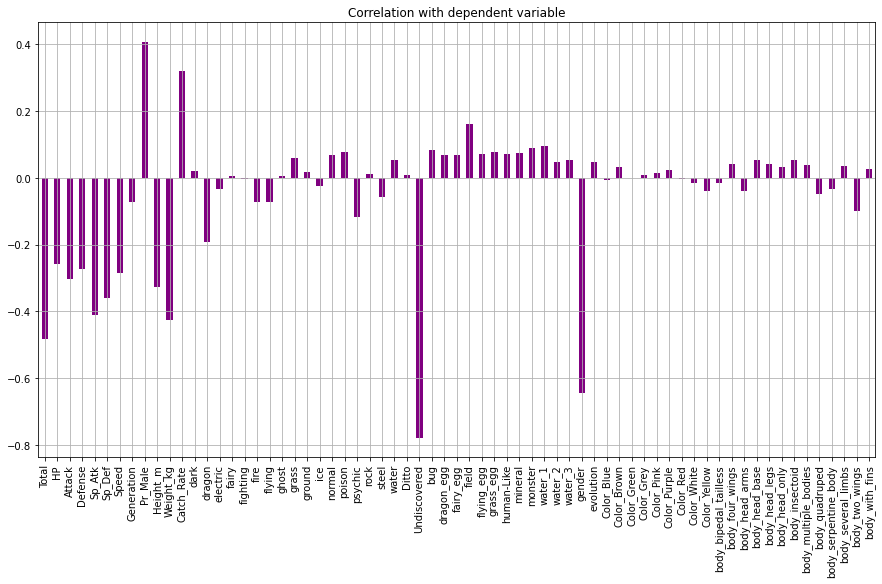

In [56]:
# target 과 독립변수들과의 상관계수 그래프 

import matplotlib.pyplot as plt
import numpy as np
df.drop('legend', axis=1).corrwith(df.legend).plot(kind='bar',color='purple', grid=True, figsize=(15, 8), title="Correlation with dependent variable")                        

In [57]:
# 그래프 를 보고 상관계수가 음수로 가는 컬럼 위주로 드랍 시킨다. 
df.drop(['Undiscovered','gender','Total','Pr_Male','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Generation','Catch_Rate','water','evolution','Height_m','Weight_kg'],axis=1,inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   dark                   721 non-null    int64
 1   dragon                 721 non-null    int64
 2   electric               721 non-null    int64
 3   fairy                  721 non-null    int64
 4   fighting               721 non-null    int64
 5   fire                   721 non-null    int64
 6   flying                 721 non-null    int64
 7   ghost                  721 non-null    int64
 8   grass                  721 non-null    int64
 9   ground                 721 non-null    int64
 10  ice                    721 non-null    int64
 11  normal                 721 non-null    int64
 12  poison                 721 non-null    int64
 13  psychic                721 non-null    int64
 14  rock                   721 non-null    int64
 15  steel                  721 non-null    i

In [59]:
X = df.drop('legend',axis=1)
y = df['legend']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,stratify=y, test_size=100)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,stratify=y_train_val, test_size=100)


In [61]:
X_train.shape,X_val.shape,X_test.shape

((521, 51), (100, 51), (100, 51))

In [62]:
# 기준모델 기준모델로 최다 비율 클래스를 사용할 경우 정확도
# 0 : 전설포켓몬일 확률 1: 전설포켓몬이 아닐 확률

target = 'legend'
y_train1 = df[target]
y_train1.value_counts(normalize=True)

1    0.9362
0    0.0638
Name: legend, dtype: float64

In [63]:
major = y_train1.mode()[0]
y_pred = [major] * len(y_train1)

In [64]:
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train1, y_pred))

training accuracy:  0.9361997226074896


In [65]:
# 분류 기준으로 잡았기 때문에 LogisticRegression 

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)



In [66]:
X_train_scaled

array([[-0.26422565, -0.23831729, -0.25152596, ..., -0.13989093,
         3.33410844, -0.19454718],
       [-0.26422565, -0.23831729, -0.25152596, ..., -0.13989093,
        -0.29993026,  5.1401413 ],
       [-0.26422565, -0.23831729, -0.25152596, ..., -0.13989093,
        -0.29993026, -0.19454718],
       ...,
       [-0.26422565, -0.23831729, -0.25152596, ..., -0.13989093,
        -0.29993026, -0.19454718],
       [-0.26422565, -0.23831729, -0.25152596, ..., -0.13989093,
        -0.29993026, -0.19454718],
       [-0.26422565, -0.23831729, -0.25152596, ..., -0.13989093,
        -0.29993026, -0.19454718]])

In [67]:
X_train_scaled.T[0].mean(), X_train_scaled.T[0].std()


(0.0, 0.9999999999999999)

In [68]:
model = LogisticRegression(random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
# 검증 정확도 
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

0.94

In [70]:
# 테스트 정확도 
X_test_scaled = scaler.transform(X_test)
y_pred_test = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.95

In [71]:
coefficients = pd.Series(model.coef_[0], X_train.columns)
coefficients

dark                     0.191157
dragon                  -0.857500
electric                 0.119929
fairy                   -0.036032
fighting                 0.344961
fire                     0.018978
flying                  -0.617594
ghost                    0.135689
grass                    0.645846
ground                  -0.083877
ice                     -0.117577
normal                  -0.113502
poison                   0.805366
psychic                 -0.314584
rock                    -0.575276
steel                   -0.387686
Ditto                    0.158955
bug                      1.292197
dragon_egg               1.567116
fairy_egg                0.705566
field                    2.125553
flying_egg               1.608268
grass_egg                0.343810
human-Like               1.056687
mineral                  1.274318
monster                  1.790345
water_1                  0.873478
water_2                  0.660494
water_3                  0.813696
Color_Blue    

In [72]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.98      0.97      0.97        94

    accuracy                           0.95       100
   macro avg       0.77      0.82      0.79       100
weighted avg       0.95      0.95      0.95       100



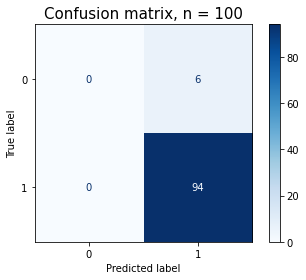

In [73]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

In [74]:
cm = pcm.confusion_matrix
cm

array([[ 0,  6],
       [ 0, 94]])

In [75]:
# 랜덤 포레스트 모델 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

rfc = make_pipeline(RandomForestClassifier(n_jobs=-1, random_state=2,n_estimators=200))
rfc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=-1,
                                        oob_score=False, random_state=2,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [76]:
print('훈련 정확도', rfc.score(X_train, y_train))
print('검증 정확도', rfc.score(X_val, y_val))

훈련 정확도 0.9961612284069098
검증 정확도 0.93


In [77]:
print('테스트 정확도', rfc.score(X_test, y_test))

테스트 정확도 0.96


In [78]:
rfc_pred = rfc.predict(X_test)

In [79]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.97      0.99      0.98        94

    accuracy                           0.96       100
   macro avg       0.86      0.74      0.79       100
weighted avg       0.96      0.96      0.96       100



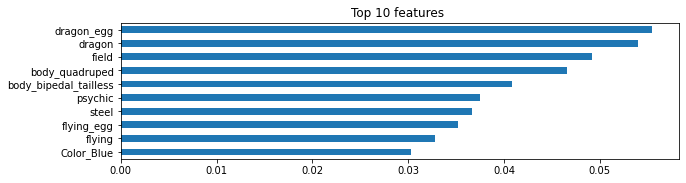

In [80]:
# 특성 중요도
import matplotlib.pyplot as plt

rf = rfc.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 10
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features ')
importances.sort_values()[-n:].plot.barh();

In [81]:
from xgboost import XGBClassifier


my_model_xgb = XGBClassifier(n_estimators=1000
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

my_model_xgb.fit(X_train, y_train, eval_set=eval_set, eval_metric='error', 
          early_stopping_rounds=100)

[0]	validation_0-error:0.053743	validation_1-error:0.05
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.053743	validation_1-error:0.05
[2]	validation_0-error:0.053743	validation_1-error:0.05
[3]	validation_0-error:0.053743	validation_1-error:0.05
[4]	validation_0-error:0.053743	validation_1-error:0.05
[5]	validation_0-error:0.053743	validation_1-error:0.05
[6]	validation_0-error:0.051823	validation_1-error:0.05
[7]	validation_0-error:0.051823	validation_1-error:0.05
[8]	validation_0-error:0.049904	validation_1-error:0.05
[9]	validation_0-error:0.044146	validation_1-error:0.05
[10]	validation_0-error:0.044146	validation_1-error:0.05
[11]	validation_0-error:0.042226	validation_1-error:0.05
[12]	validation_0-error:0.040307	validation_1-error:0.05
[13]	validation_0-error:0.038388	validation_1-error:0.05
[14]	validation_0-error:0.038388	validation_1-erro

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [82]:
y_pred = my_model_xgb.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

print(classification_report(y_pred, y_val))

검증 정확도:  0.96
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       1.00      0.96      0.98        98

    accuracy                           0.96       100
   macro avg       0.67      0.98      0.74       100
weighted avg       0.99      0.96      0.97       100



In [83]:
y_pred_test = my_model_xgb.predict(X_test)
print('테스트 정확도: ', accuracy_score(y_test, y_pred_test))

print(classification_report(y_pred_test, y_test))

테스트 정확도:  0.96
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.99      0.97      0.98        96

    accuracy                           0.96       100
   macro avg       0.74      0.86      0.79       100
weighted avg       0.97      0.96      0.96       100



In [84]:
# 랜덤포레스트 하이파라미터 최적 찾기

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                     

In [85]:
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}
최고 예측 정확도: 0.9347


In [86]:
# 랜덤 포레스트 모델에 적용 
rfc1 = make_pipeline(RandomForestClassifier(n_jobs=-1, 
                                           random_state=2,
                                           n_estimators=10,
                                           max_depth=6,
                                           min_samples_leaf=8,
                                           min_samples_split=8))
                  
rfc1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=6, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=8, min_samples_split=8,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=-1,
                                        oob_score=False, random_state=2,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [87]:
print('훈련 정확도', rfc1.score(X_train, y_train))
print('검증 정확도', rfc1.score(X_val, y_val))

훈련 정확도 0.9347408829174664
검증 정확도 0.94


In [88]:
pred = rfc1.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred))) # 하이퍼파라미터를 조정한결과 오히려 그전 보다 테스트 정확도가 떨어졌다. 내가 잘못 값을 측정했거나 로지스틱모델이 젤 높은걸로 나왔다.

예측 정확도: 0.9400


In [89]:
!pip install pdpbox
!pip install shap

     |████████████████████████████████| 34.0 MB 41 kB/s 
     |████████████████████████████████| 13.1 MB 6.7 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=a9b7791c84410e700e6b78f8a3101c51451db97b22ac37d676131c6ef0987d5c
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 356 kB 9.6 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491649 sha256=73a2efbe113e5b5941a056155bcea72f034172804158211603ee211b07837c93
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [90]:
!pip install eli5

     |████████████████████████████████| 106 kB 7.8 MB/s 


In [91]:
import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [111]:
# permuter 정의
permuter = PermutationImportance(
    my_model_xgb, # model
    scoring='neg_mean_absolute_error', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_train, y_train);


import pandas as pd
feature_names = X_train.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.0845 ± 0.0116,field
0.0426 ± 0.0029,flying_egg
0.0303 ± 0.0045,dragon_egg
0.0234 ± 0.0074,body_quadruped
0.0211 ± 0.0094,dragon
0.0092 ± 0.0029,bug
0.0088 ± 0.0019,body_two_wings
0.0088 ± 0.0019,flying
0.0038 ± 0.0034,monster
0.0035 ± 0.0029,mineral


In [112]:
# permuter 정의
permuter = PermutationImportance(
    rfc, # model
    scoring='neg_mean_absolute_error', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_train, y_train);


import pandas as pd
feature_names = X_train.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.0292 ± 0.0066,field
0.0173 ± 0.0081,dragon
0.0138 ± 0.0061,psychic
0.0088 ± 0.0031,body_quadruped
0.0081 ± 0.0074,water_1
0.0081 ± 0.0015,body_head_arms
0.0077 ± 0.0042,dragon_egg
0.0073 ± 0.0029,body_bipedal_tailless
0.0069 ± 0.0019,flying
0.0061 ± 0.0015,fire


In [119]:
features = ['field', 'dragon']

interaction = pdp_interact(
    model=model, 
    dataset=X_val,
    model_features=X_val.columns, 
    features=features
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


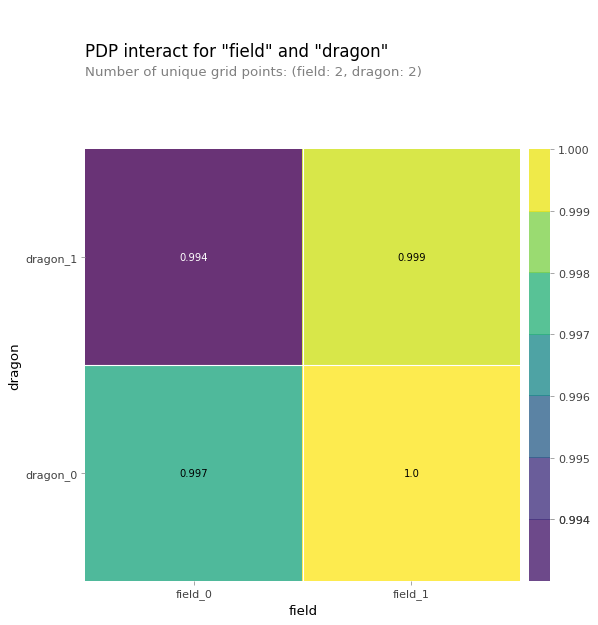

In [120]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [121]:
from sklearn.metrics import roc_auc_score

class_index = 1
y_pred_proba =  my_model_xgb.predict_proba(X_val)[:, class_index]
print(f'Test AUC for class "{ my_model_xgb.classes_[class_index]}":')
print(roc_auc_score(y_val, y_pred_proba)) # 범위는 0-1, 수치는 높을 수록 좋습니다

Test AUC for class "1":
0.9326241134751773


In [122]:
y_test_pred = model.predict(X_val)
print(classification_report(y_val, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.94      1.00      0.97        94

    accuracy                           0.94       100
   macro avg       0.47      0.50      0.48       100
weighted avg       0.88      0.94      0.91       100



In [113]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 80

In [114]:
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot

import shap



In [124]:
explainer = shap.TreeExplainer(my_model_xgb)
row = X_test.iloc[[50]]
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

In [125]:
feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

In [126]:
pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index

In [128]:
print('예측에 대한 Positive 요인 Top 3 입니다:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} : {feature_value}')

print('\n')
print('Negative 요인 Top 3 입니다:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} : {feature_value}')

예측에 대한 Positive 요인 Top 3 입니다:
1. psychic : 0
2. body_quadruped : 0
3. dragon : 0


Negative 요인 Top 3 입니다:
1. field : 0
2. bug : 0
3. mineral : 0
